chapter_2 Supervised Learning
-----------

## 2.1 분류와 회귀

#### classification
- 분류
  - 이진 분류 : binary classification
  - 다중 분류 : multiclass classification


#### regression
- 회귀
  - 연속적인 숫자 또는 프로그래밍 용어로 말하면 부동소수점수를 예측하는 것
  - 교육 수준, 나이, 주거지를 바탕으로 연간 소득을 예측하는 것이 회귀의 하나의 예
  - 수확량 예측 등등

### 2.2 Generalization, overfitting, underfitting

#### Generalization
- 일반화
- 모델이 처음 보는 데이터에 대해 정확하게 예측 할 수 있으면 이를 훈련 세트에서 테스트 세트로 일반화 되었다고 함
- 그래서 모델을 만들 때는 가능한 정확하게 일반화 되도록 해야 함

#### overfitting
- 과대적합
- 가진 정보를 모두 사용해서 너무 복잡한 모델을 만드는 것
- 모델이 훈련 세트의 각 샘플에 너무 가깝게 맞춰져서 새로운 데이터에 일반화되기 어려울 때 발생함
- 한 마디로 훈련 세트에만 최적화 된 모델을 생성

#### underfitting
- 과소 적합
- 너무 간단한 모델이 선택 되는 것


sweet spot을 어떻게 찾을 것인가?

![alt text](https://github.com/amueller/introduction_to_ml_with_python/raw/62a9b3fb553650b0bab0f6a738da033be6e5af55/images/overfitting_underfitting_cartoon.png)

### 2.2.1 모델 복잡도와 데이터셋 크기의 관계

> 모델의 복잡도는 훈련 데이터셋에 담긴 입력 데이터의 다양성과 관련

> 데이터셋에 다양한 데이터 포인트가 많을 수록 과대적합 없이 더 복잡한 모델을 만들 수 있다.

> 그러나 같은 데이터 포인트를 중복하거나 매우 비슷한 데이터를 모으는 것은 도움이 되지 않는다.

> 데이터양의 힘을 과소 평가하지 말고 열심히 모으자.

### 2.3 지도 학습 알고리즘

### 2.3.1 예제용 데이터셋

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from matplotlib import font_manager, rc
apple = font_manager.FontProperties(fname = '/Library/Fonts/AppleGothic.ttf').get_name()
rc('font', family = apple)

%matplotlib inline

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


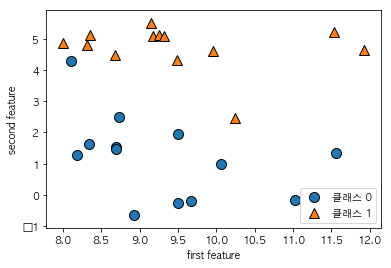

In [6]:
# make binary dataset using mglearn

X, y = mglearn.datasets.make_forge()

# draw scatter plot
mglearn.discrete_scatter(X[:, 0], X[:, 1:], y)
plt.legend(['클래스 0', '클래스 1'], loc=4)
plt.xlabel("first feature")
plt.ylabel("second feature")
plt.show()

In [7]:
print(X.shape)

(26, 2)


--------

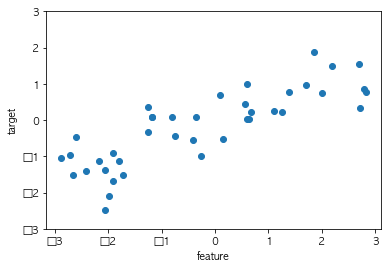

In [12]:
# make dataset for regression

X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel('feature')
plt.ylabel('target')
plt.show()

#### 위스콘신 유방암 데이터

In [13]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [16]:
print(cancer['data'].shape)

(569, 30)


In [18]:
# benign : 양성, malignant : 악성

print("Sample counts per class:\n",
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

Sample counts per class:
 {'malignant': 212, 'benign': 357}


In [19]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [20]:
# dataset for regression


from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape:", boston.data.shape)

Data shape: (506, 13)


In [22]:
# completed feature engineering dataset
# feature engineering을 이용해서 13개에서 104개로 늘림

X, y = mglearn.datasets.load_extended_boston()
print(X.shape)

(506, 104)


### 2.3.2 KNN

#### KNN?
- K-Nearset Neighbors
- 새로운 데이터 포인트에 대해 알고리즘이 훈련 데이터셋에서 가장 가까운 데이터 포인트, **최근접 이웃**을 찾음

#### KNN classification

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


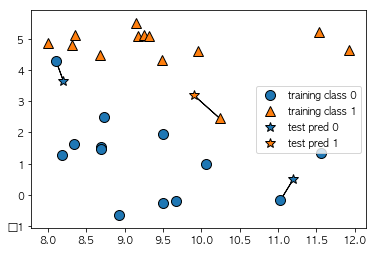

In [25]:
# 1개로 정할 때

mglearn.plots.plot_knn_classification(n_neighbors=1)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


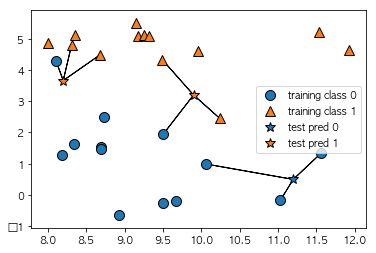

In [27]:
# 이웃하는 점의 개수를 3개로 정할 때

mglearn.plots.plot_knn_classification(n_neighbors=3)

In [28]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [29]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)

In [30]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [31]:
print(clf.predict(X_test))

[1 0 1 0 1 0 0]


In [32]:
clf.score?

Signature: clf.score(X, y, sample_weight=None)
Docstring:
Returns the mean accuracy on the given test data and labels.

In multi-label classification, this is the subset accuracy
which is a harsh metric since you require for each sample that
each label set be correctly predicted.

Parameters
----------
X : array-like, shape = (n_samples, n_features)
    Test samples.

y : array-like, shape = (n_samples) or (n_samples, n_outputs)
    True labels for X.

sample_weight : array-like, shape = [n_samples], optional
    Sample weights.

Returns
-------
score : float
    Mean accuracy of self.predict(X) wrt. y.
File:      /anaconda3/lib/python3.7/site-packages/sklearn/base.py
Type:      method


In [33]:
clf.score(X_test, y_test)

0.8571428571428571

#### KNN-classifier 분석

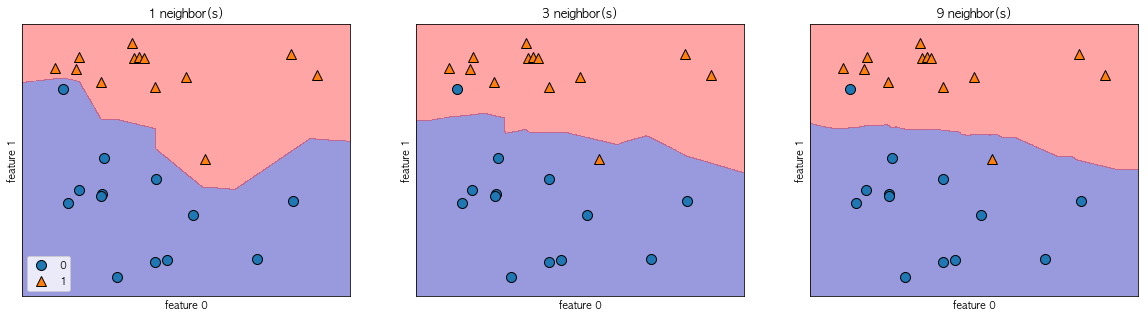

In [36]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)


decision boundary : 결정 경계
- n_neighbor = 1일 때는 decision boundary 가 훈련 데이터에 가깝게 따라감
- 숫자를 늘릴 수록 경계가 부드러워짐
- n_neighbor 적게 사용할 수록 모델의 복잡도가 높아지고, 많이 사용할 수록 복잡도는 낮아짐

#### complexity vs generalization with model

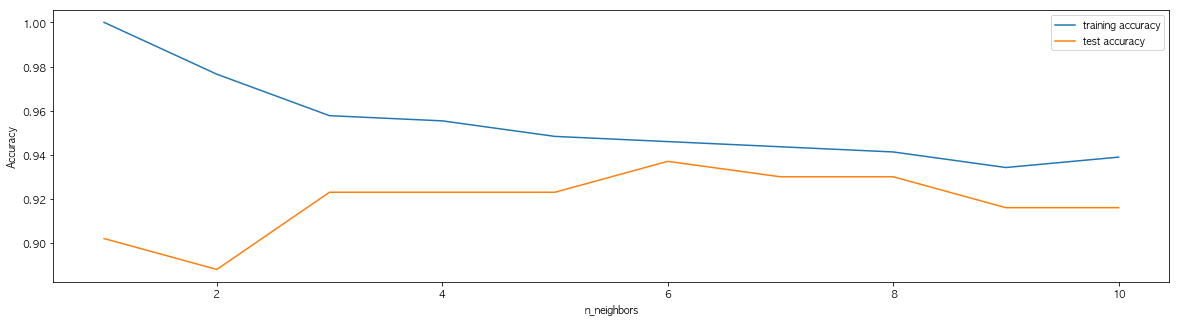

In [40]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.figure(figsize = (20, 5))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

n_neighbors가 하나 일 때
- training accuracy가 완벽, 그러나 n_neighbors가 늘어나면 떨어진다.
- test accuracy가는 낮음, 그러나 n_neighbors가 늘어나면 변화가 있다.
- 적은 경우는 모델을 너무 복잡하게 만든 다는 것, 반대로 많을 경우 모델이 너무 단순해서 정확도가 나빠짐
- 이 경우에 한해서 가장 좋을 때는 6개를 사용 할 때임

#### KNN regression

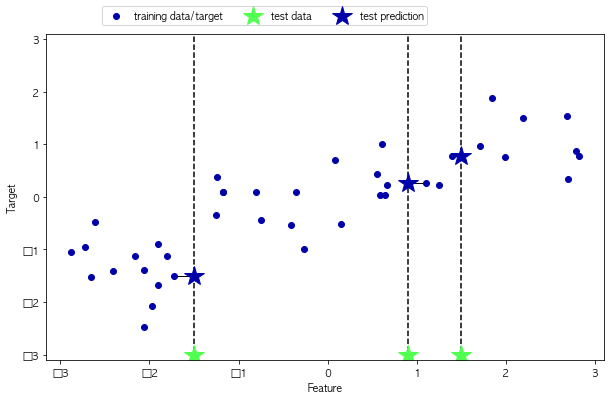

In [42]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

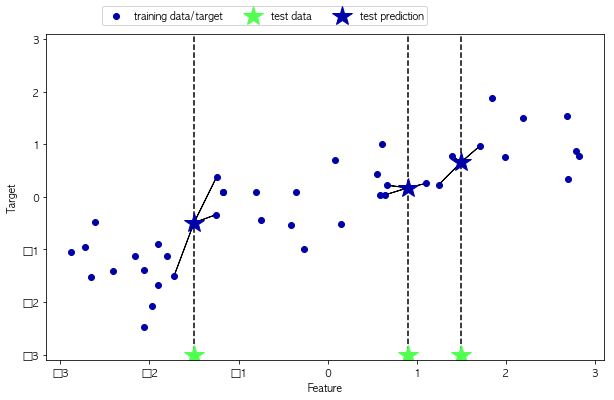

In [43]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [44]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)

# fit the model using the training data and training targets
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform')

In [45]:
print("Test set predictions:\n", reg.predict(X_test))

Test set predictions:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [46]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


#### R^2?

- [결정계수에 대한 직관 기르기](https://ko.khanacademy.org/math/statistics-probability/describing-relationships-quantitative-data/assessing-the-fit-in-least-squares-regression/a/r-squared-intuition)
- 결정 계수
  - 회귀 모델에서 예측의 적합도를 측정한 것
  - 보통 0~1사이의 값이 됨
  - 1은 예측이 완벽한 경우, 0은 훈련 세트의 출력값인 y_train의 평균으로만 예측하는 모델의 경우
  - 음수가 될 수도 있음, 이 때는 타깃이 상반된 경향을 가지는 경우에 한함

$$
1\quad -\quad \frac { \sum { { (y-y) }^{ 2 } }  }{ \sum { { (y-\hat { y } ) }^{ 2 } }  } 
$$

#### KNN regression 분석

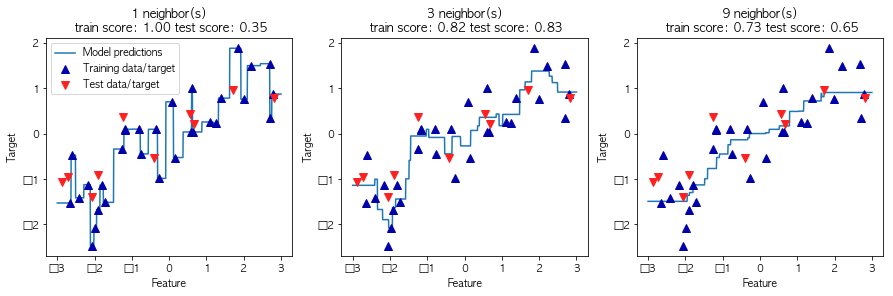

In [47]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")

#### 장단점과 매개변수

매개변수
- 중요한 것은 두 개
  - 데이터 포인트 사이의 거리를 재는 방법 : 유클리디안 distance를 사용 : https://ko.wikipedia.org/wiki/%EC%9C%A0%ED%81%B4%EB%A6%AC%EB%93%9C_%EA%B1%B0%EB%A6%AC
    - 쉽게 말하면 두 점 사이의 거리를 재는 공식 생각하면 됩니다.
  - 이웃의 수 : 잘 설정해야 함
  
  
장점
- 이해하기 쉬운 모델
- parameter 조정이 적어도 좋은 성능 얻을 수 있음
- 복잡한 알고리즘 적용 전에 시도해 볼 수 있는 시작 방법임


단점
- train set이 매우 크면(feature, sample 등이 크면) 예측이 느려짐
- 데이터 전처리가 무척 중요함
- feature가 수백 개 이상이 될 경우에는 잘 동작하지 않음
- 특성 값이 대부분 0인 (즉, 희소한...sparse) 데이터셋에서는 특히 잘 작동하지 않음

현업에서는 잘 안 쓰임